# Loss Landscape
In this notebook we plot the loss landscape of the models to see how it is efffected by the quantization and see the correlation between some metrics and the robustnmess of the model.

In [15]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from pylab import *
import os
import pickle
import pandas as pd
import numpy as np
from paretoset import paretoset

import loss_landscapes
import loss_landscapes.metrics


# Correlation between robustness and metrics

## ECON

Build the dataset by merging all the analysis

In [16]:
df_noise = pd.read_csv('./results/econ/noise.csv')
df_cka = pd.read_csv('./results/econ/cka.csv')
df_fisher = pd.read_csv('./results/econ/fisher.csv')
df_neural_efficiency = pd.read_csv('./results/econ/neural_efficiency.csv')
df_hessian = pd.read_csv("./results/econ/hessian.csv")

In [17]:
df_cka = df_cka[['precision', 'batch_size', 'learning_rate', 'avg_cka']]
df_fisher = df_fisher[['precision', 'batch_size', 'learning_rate', 'avg_EF']]
df_neural_efficiency = df_neural_efficiency[['precision', 'batch_size', 'learning_rate', 'net_efficiency']]
df_hessian = df_hessian[['precision', 'batch_size', 'learning_rate', 'trace', 'eigenvalue']]
dataset_df = pd.merge(df_noise, df_cka, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_fisher, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_neural_efficiency, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_hessian, on=['precision', 'batch_size', 'learning_rate'])
dataset_df.head(1)

precision        emd   noise 5%  noise 10%  noise 15%  noise 20%  \
0          2  13.756807  13.756808  13.756808  13.756808  13.756808   

   batch_size  learning_rate  avg_cka  avg_EF  net_efficiency  trace  \
0          16            0.1      0.0     0.0        0.005529    0.0   

   eigenvalue  
0         0.0

Apply modification to some columns:

In [18]:
dataset_df['trace'] = dataset_df['trace'].apply(lambda x: np.log10(x) if x > 0 else x)
dataset_df['avg_EF'] = dataset_df['avg_EF'].apply(lambda x: np.log10(x) if x > 0 else x)
dataset_df['eigenvalue'] = dataset_df['eigenvalue'].apply(lambda x: np.log10(x) if x > 0 else x)

In [19]:
dataset_df.to_csv('./results/econ/dataset.csv', index=False)
# dataset_df = dataset_df[~dataset_df['precision'].isin([2])]

In [20]:
dataset_df.drop(columns=['noise 10%', 'noise 15%', 'noise 20%'], inplace=True)
# sns.pairplot(dataset_df, corner=True)
# plt.show()

In [21]:
correlation_matrix = dataset_df.corr()

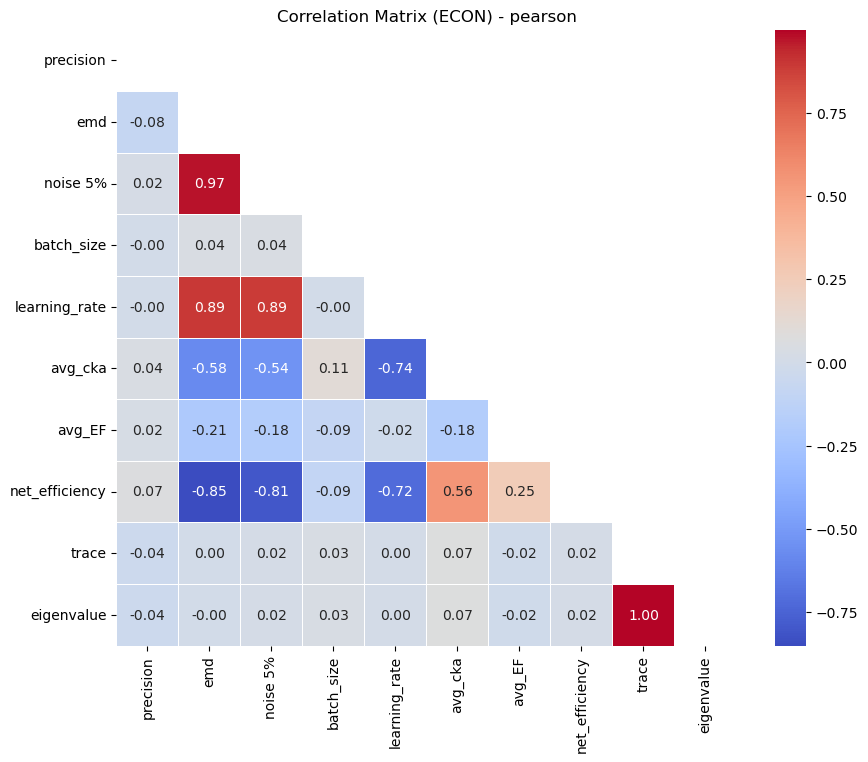

In [22]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (ECON) - pearson')
plt.show()

Check the logarithmic correlation:

In [23]:
correlation_matrix = dataset_df.corr(method='spearman')

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix (ECON) - spearman')
# plt.show()

In [10]:
correlation_matrix = dataset_df.corr(method='kendall')

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix (ECON) - kendall')
# plt.show()

## RN08

In [11]:
df_noise = pd.read_csv('./results/rn08/noise.csv')
# df_cka = pd.read_csv('./results/rn08/cka.csv')
df_fisher = pd.read_csv('./results/rn08/fisher.csv')
df_neural_efficiency = pd.read_csv('./results/rn08/neural_efficiency.csv')
df_hessian = pd.read_csv("./results/rn08/hessian.csv")

In [12]:
df_cka = df_cka[['precision', 'batch_size', 'learning_rate', 'avg_cka']]
df_fisher = df_fisher[['precision', 'batch_size', 'learning_rate', 'avg_EF']]
df_neural_efficiency = df_neural_efficiency[['precision', 'batch_size', 'learning_rate', 'net_efficiency']]
df_hessian = df_hessian[['precision', 'batch_size', 'learning_rate', 'trace', 'eigenvalue']]
dataset_df = pd.merge(df_noise, df_cka, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_fisher, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_neural_efficiency, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_hessian, on=['precision', 'batch_size', 'learning_rate'])
dataset_df.head(1)

precision  accuracy  noise accuracy  batch_size  learning_rate  avg_cka  \
0          2  0.095353             0.1          16            0.1      0.0   

                                              avg_EF  net_efficiency  \
0  {'EF_trace_w': array([1.1159039e-13, 3.9345138...        0.044618   

      trace    eigenvalue  
0  0.001163 -4.725438e-11

In [13]:
dataset_df['trace'] = dataset_df['trace'].apply(lambda x: np.log10(x) if x > 0 else x)
dataset_df['avg_EF'] = dataset_df['avg_EF'].apply(lambda x: np.log10(x) if x > 0 else x)
dataset_df['eigenvalue'] = dataset_df['eigenvalue'].apply(lambda x: np.log10(x) if x > 0 else x)

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
dataset_df.to_csv('./results/rn08/dataset.csv', index=False)

In [ ]:
#sns.pairplot(dataset_df, corner=True)
#plt.show()

In [ ]:
correlation_matrix = dataset_df.corr()

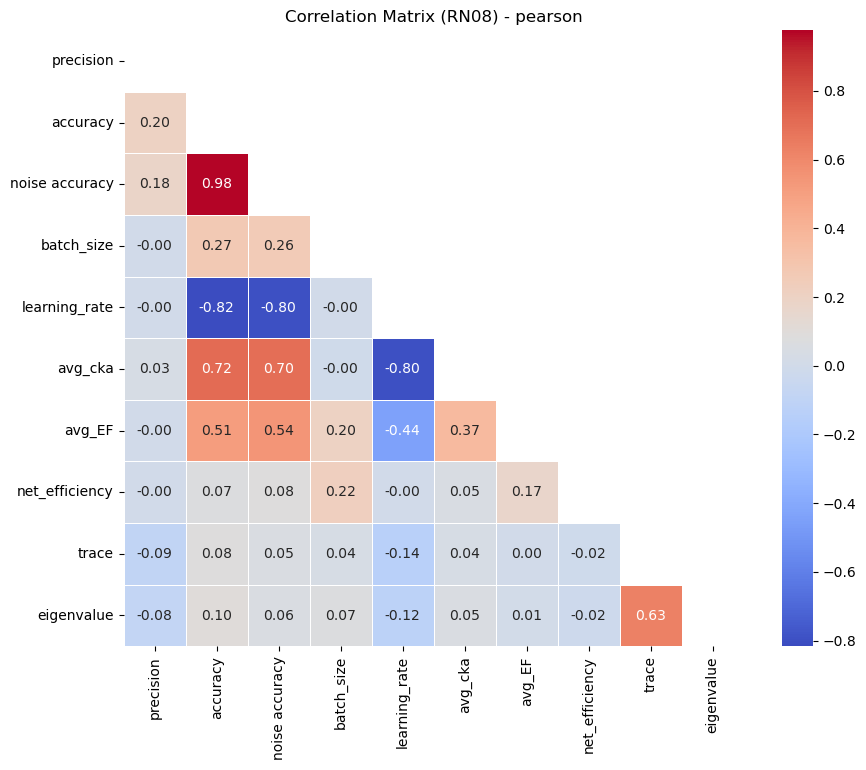

In [ ]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (RN08) - pearson')
plt.show()

# Effect of the quantization on the loss landscapes

In [ ]:
DATA_PATH = '/data/tbaldi/work/checkpoint/'

In [ ]:
def get_econ_loss_landscapes(batch_size, 
                        learning_rate, 
                        precision,
                        size, 
                        normalization,
                        steps, 
                        distance):
    '''
    Get the value of the Neural Efficiency
    '''
    # path to the directory
    path = os.path.join(
        DATA_PATH, 
        f'bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}/',
        f'plot_{normalization}_{steps}_{distance}.pkl'
    )
    try:
        f = open(path, "rb")
        data = pickle.load(f)
        f.close()
    except:
        print(path + ' Not found!')
        return False
    
    return data[f'plot_{normalization}_{steps}_{distance}']
    
def get_rn08_loss_landscapes(batch_size, 
                             learning_rate, 
                             precision, 
                             normalization,
                             steps, 
                             distance):
    '''
    Get the value of the Neural Efficiency
    '''
    # path to the directory
    path = os.path.join(
        DATA_PATH, 
        f'bs{batch_size}_lr{learning_rate}/RN08_{precision}b/',
        f'plot_{normalization}_{steps}_{distance}.pkl'
    )
    try:
        f = open(path, "rb")
        data = pickle.load(f)
        f.close()
    except:
        print(path + ' Not found!')
        return False
    
    return data[f'plot_{normalization}_{steps}_{distance}']
    

## ECON

In [ ]:
BATCH_SIZE = 256
LEARNING_RATE = 0.0015625
NORMALIZATION = 'filter'
STEPS = 200
DISTANCE = 150
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

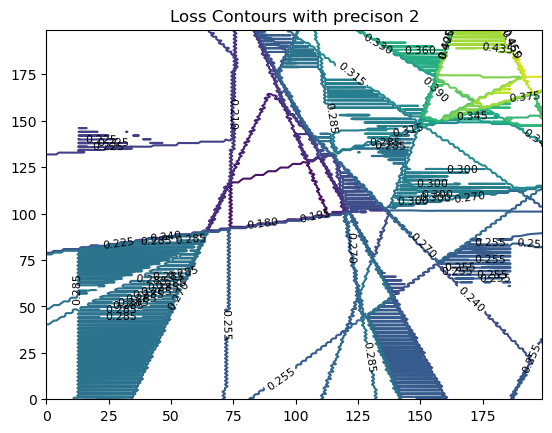

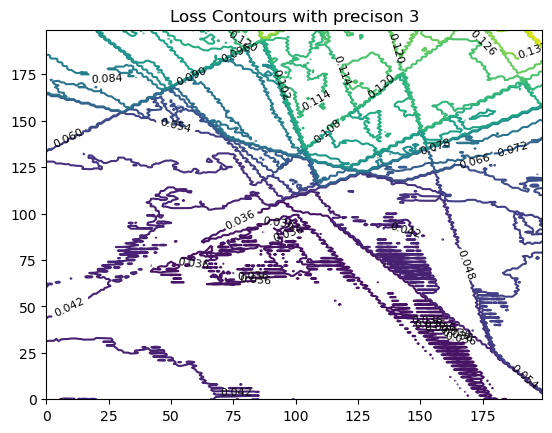

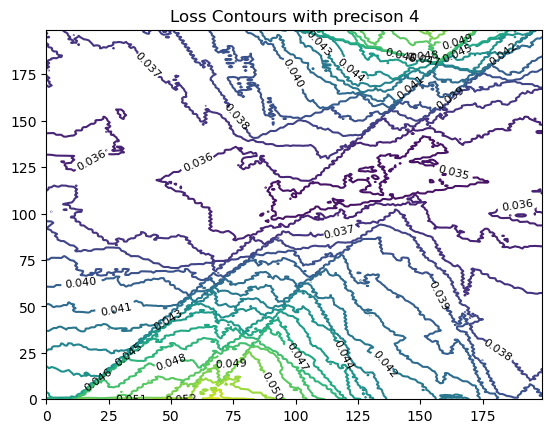

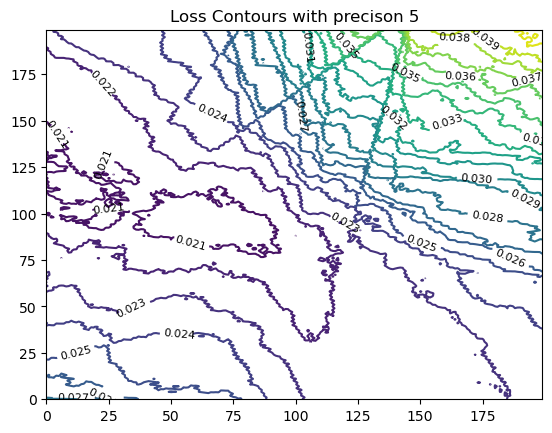

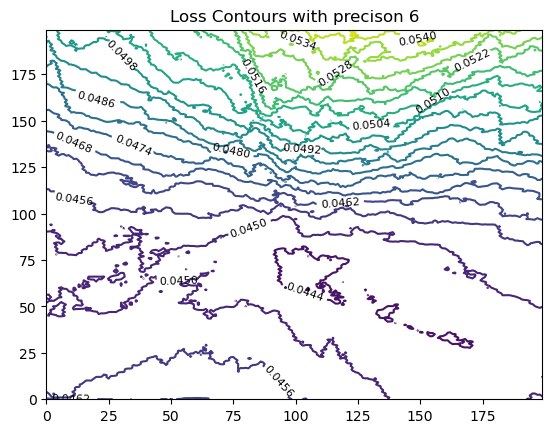

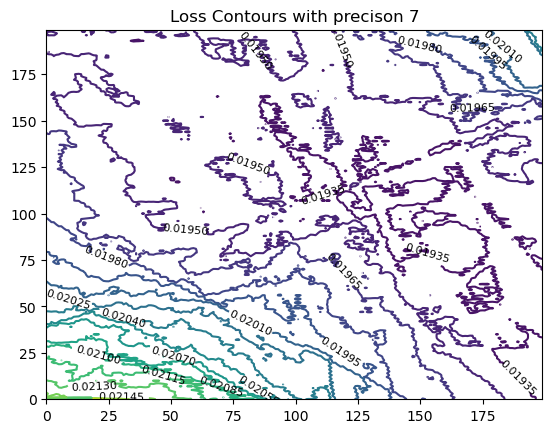

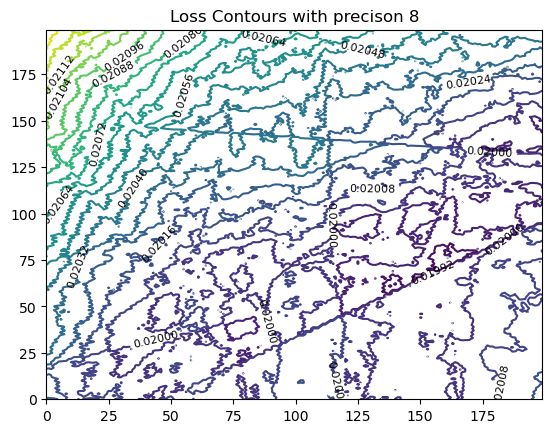

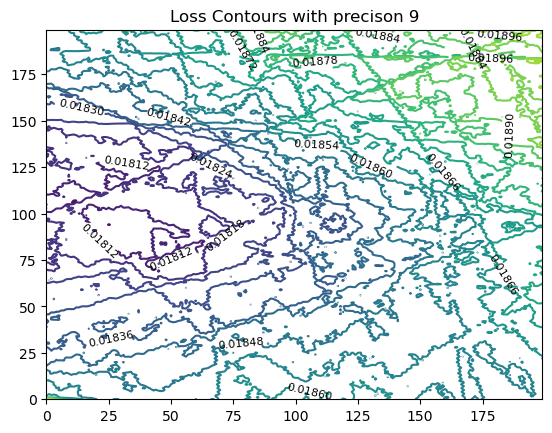

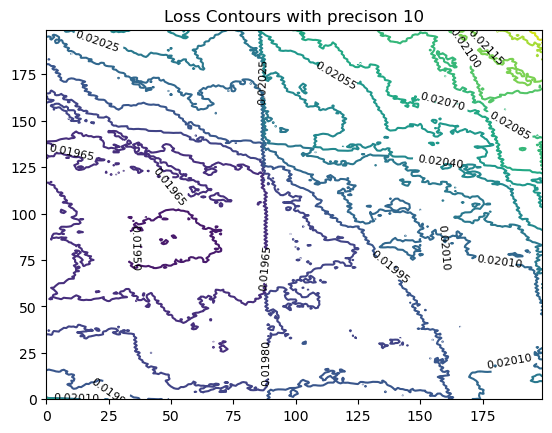

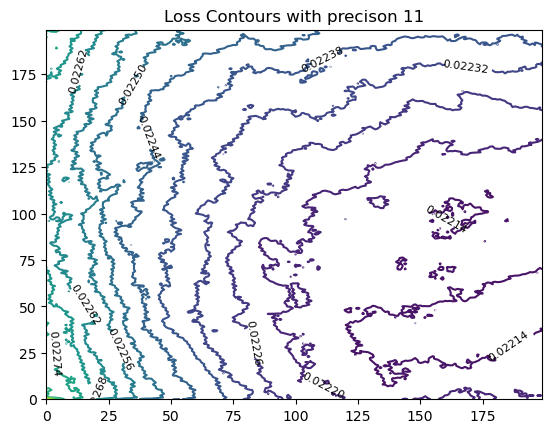

In [ ]:
for p in precisions:
    data = get_econ_loss_landscapes(BATCH_SIZE, LEARNING_RATE, p, 'baseline', NORMALIZATION, STEPS, DISTANCE)
    loss_data = data['points']
    # plot 2D
    plot = plt.contour(loss_data, levels=20)
    plt.clabel(plot, inline=True, fontsize=8, colors='black')
    plt.title(f'Loss Contours with precison {p}')
    plt.show()
    


/tmp/ipykernel_6471/1289611872.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


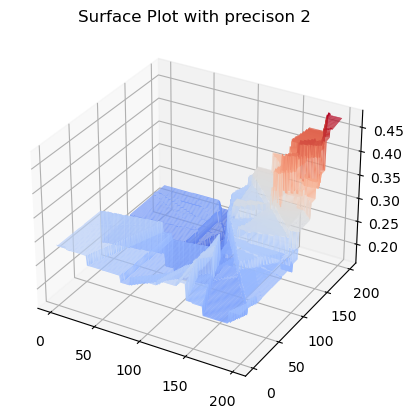

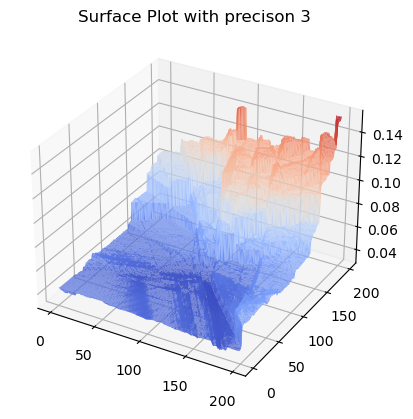

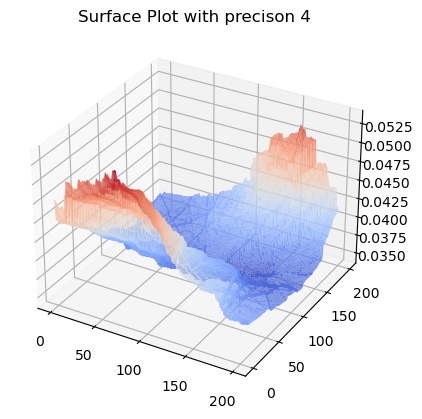

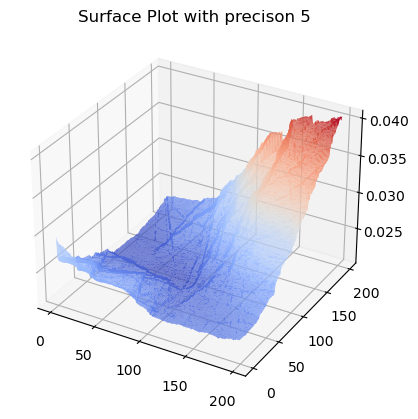

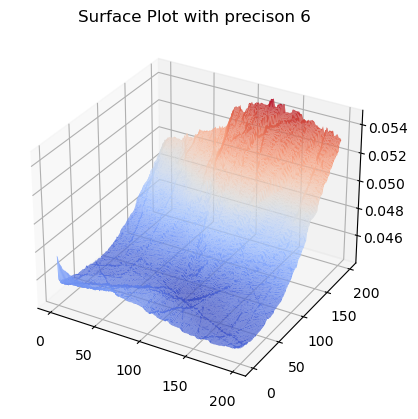

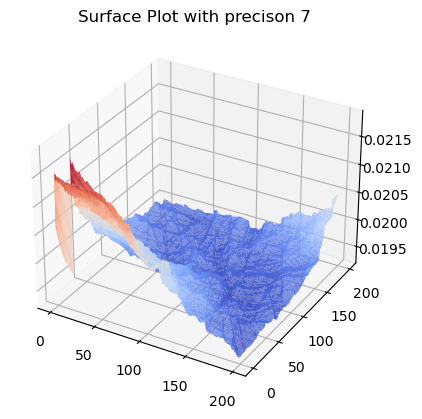

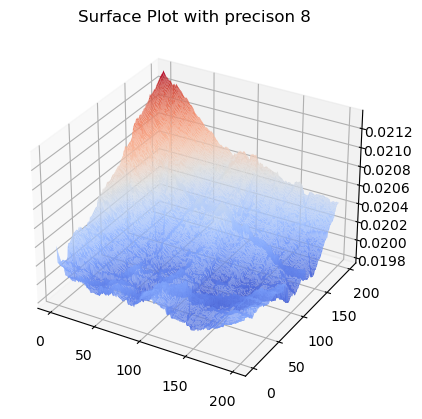

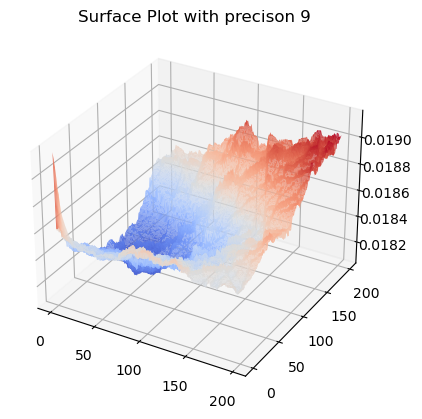

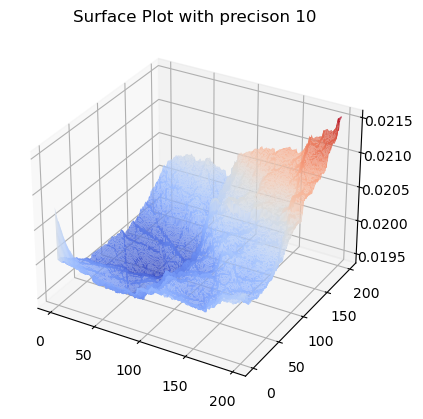

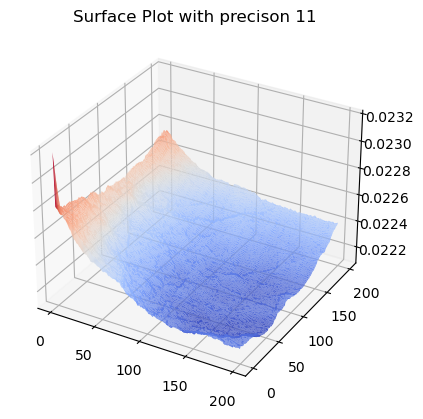

In [ ]:
for p in precisions:
    data = get_econ_loss_landscapes(BATCH_SIZE, LEARNING_RATE, p, 'baseline', NORMALIZATION, STEPS, DISTANCE)
    loss_data = data['points']    
    # #plot 3D
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    X = np.array([[j for j in range(STEPS)] for i in range(STEPS)])
    Y = np.array([[i for _ in range(STEPS)] for i in range(STEPS)])
    ax.plot_surface(X, Y, loss_data, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
    ax.set_title(f'Surface Plot with precison {p}')
    fig.show()

## RN08

In [ ]:
BATCH_SIZE = 256
LEARNING_RATE = 0.0015625
NORMALIZATION = 'filter'
STEPS = 50
DISTANCE = 100
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
for p in precisions:
    data = get_rn08_loss_landscapes(BATCH_SIZE, LEARNING_RATE, p, NORMALIZATION, STEPS, DISTANCE)
    loss_data = data['points']
    # plot 2D
    plot = plt.contour(loss_data, levels=5)
    plt.clabel(plot, inline=True, fontsize=8, colors='black')
    plt.title(f'Loss Contours with precison {p}')
    plt.show()
    

/data/tbaldi/work/checkpoint/bs256_lr0.0015625/RN08_2b/plot_filter_50_100.pkl Not found!


TypeError: 'bool' object is not subscriptable

/tmp/ipykernel_27300/842761857.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


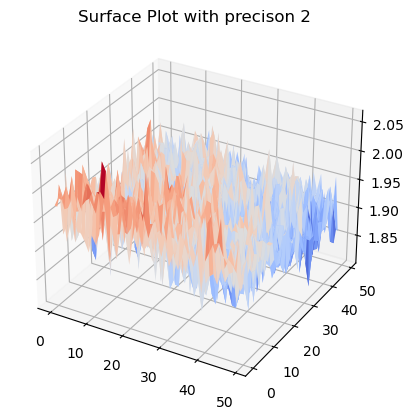

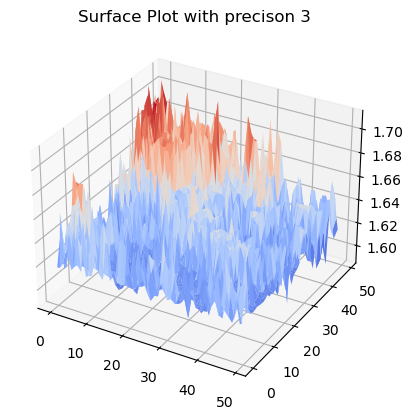

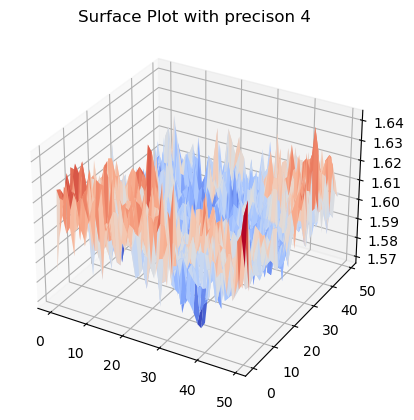

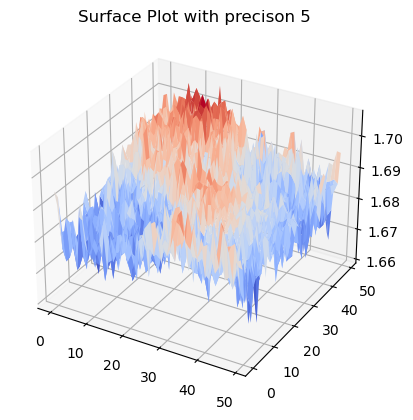

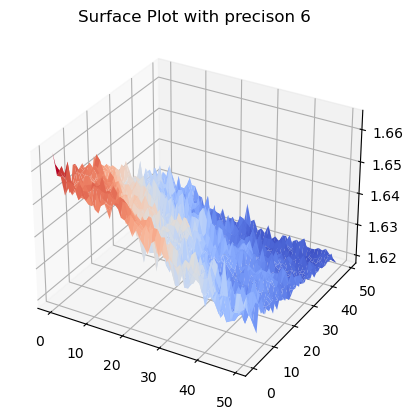

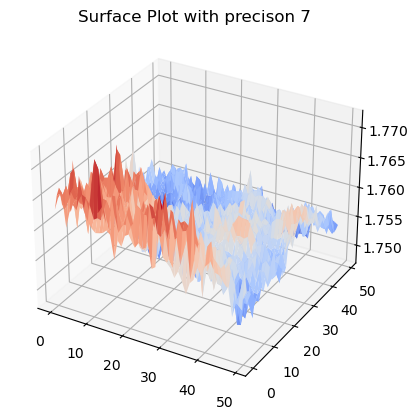

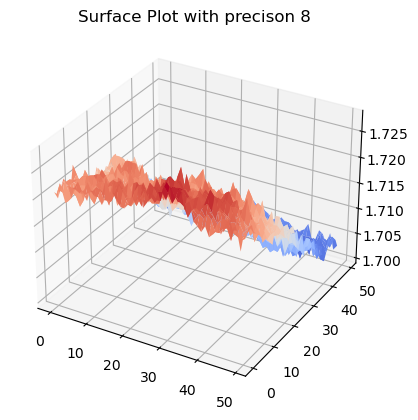

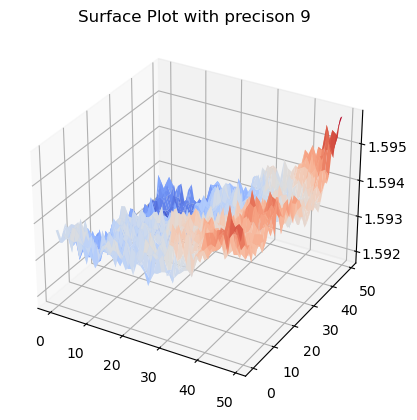

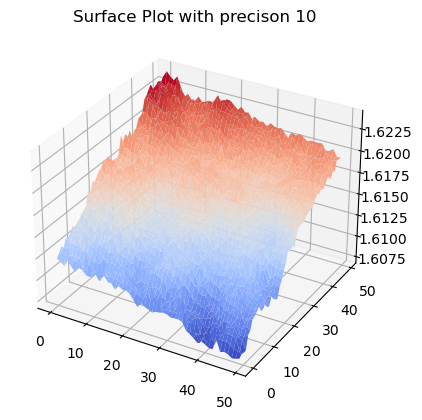

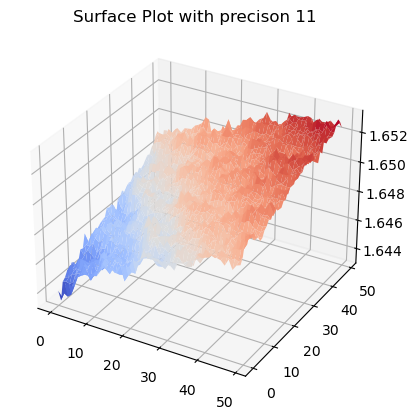

In [ ]:
for p in precisions:
    data = get_rn08_loss_landscapes(BATCH_SIZE, LEARNING_RATE, p, NORMALIZATION, STEPS, DISTANCE)
    loss_data = data['points']    
    # #plot 3D
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    X = np.array([[j for j in range(STEPS)] for i in range(STEPS)])
    Y = np.array([[i for _ in range(STEPS)] for i in range(STEPS)])
    ax.plot_surface(X, Y, loss_data, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
    ax.set_title(f'Surface Plot with precison {p}')
    fig.show()

# Features of the non-dominated solutions
We can see our task as Multi-Objective problems, indeed we have 3 objective function:

- we prefer models with higher accuracy;
- we prefer models with lower precision;
- we prefer models with higher robustness.

The idea is to evidence the non-dominated solutions of our analysis to check what are the characteristics of those kinds of models.

In [24]:
df = dataset_df[['precision', 'emd', 'noise 5%']].copy()

### Efficiebt set of our grid search

In [25]:
front = 0
while not df.empty:
    front += 1
    # compute non dominated solutions
    best_mask = paretoset(df, sense=['min', 'min', 'min'])
    ES_df = df[best_mask].copy()
    # update dataset
    dataset_df.loc[ES_df.index, "front"] = front
    # remove front from the population
    df = df.drop(ES_df.index)
    
FRONTS = 5

In [26]:
dataset_df[dataset_df['front'] <= FRONTS]

precision       emd  noise 5%  batch_size  learning_rate   avg_cka  \
6            2  2.768796  2.607853          16       0.001563  0.506034   
12           2  2.891344  2.885671          32       0.003125  0.644201   
13           2  2.894219  2.910465          32       0.001563  0.653695   
20           2  2.925020  2.922750          64       0.001563  0.590240   
27           2  2.715291  2.543496         128       0.001563  0.533331   
..         ...       ...       ...         ...            ...       ...   
426         10  1.183586  2.537155         256       0.001563  0.735231   
447         11  1.120972  3.225034          16       0.001563  0.696128   
459         11  1.132923  3.522740          64       0.006250  0.580748   
460         11  1.123161  3.758025          64       0.003125  0.627096   
461         11  1.127617  3.419863          64       0.001563  0.705255   

       avg_EF  net_efficiency     trace  eigenvalue  front  
6   -2.471943        0.205131  3.547608 -149.527501    2.0  
12  -3.575014        0.166002  3.900719    1.545478    3.0  
13  -3.607831        0.157010  4.279723    1.781148    4.0  
20  -4.904179        0.126553  4.829788    2.311485    5.0  
27  -1.751940        0.289450  4.131345    1.476649    1.0  
..        ...             ...       ...         ...    ...  
426 -1.211118        0.323377  6.710299    4.142532    5.0  
447 -1.019415        0.390916  6.362072    3.654357    3.0  
459 -1.322590        0.409418  7.347469    4.591418    5.0  
460 -1.153983        0.399341  7.467403    4.729418    4.0  
461 -1.063190        0.394470  7.017631    4.361970    4.0  

[71 rows x 11 columns]

### 2D plots

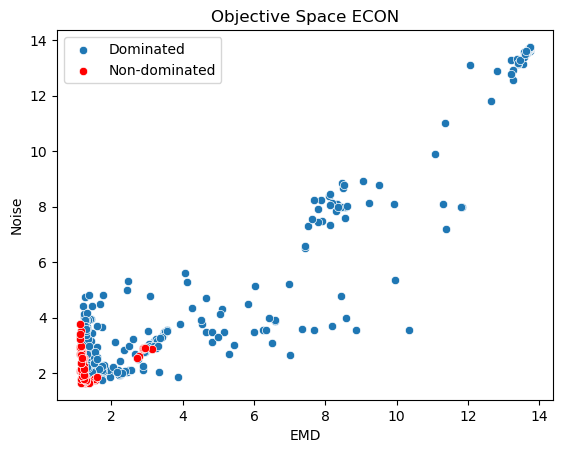

In [27]:
sns.scatterplot(x='emd', y='noise 5%', data=dataset_df, label='Dominated')
sns.scatterplot(x='emd', y='noise 5%', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.xlabel('EMD')
plt.ylabel('Noise')
plt.title(f'Objective Space ECON')

# Display the plot
plt.legend()
plt.show()

Let's try to plot them comparing the lerning rate with the neural efficiency due to their correlation.

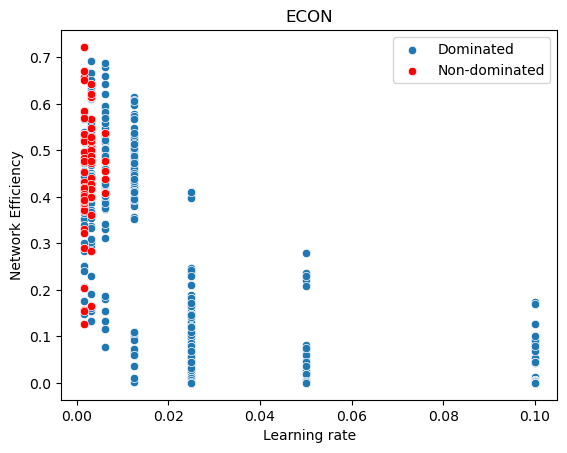

In [28]:
sns.scatterplot(y='net_efficiency', x='learning_rate', data=dataset_df, label='Dominated')
sns.scatterplot(y='net_efficiency', x='learning_rate', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Network Efficiency')
plt.xlabel('Learning rate')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

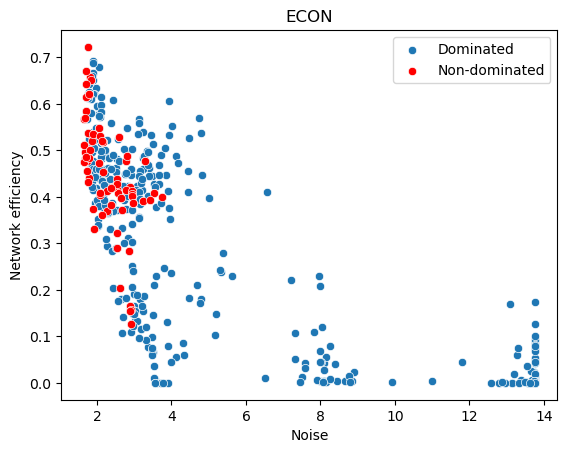

In [29]:
sns.scatterplot(x='noise 5%', y='net_efficiency', data=dataset_df, label='Dominated')
sns.scatterplot(x='noise 5%', y='net_efficiency', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.xlabel('Noise')
plt.ylabel('Network efficiency')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

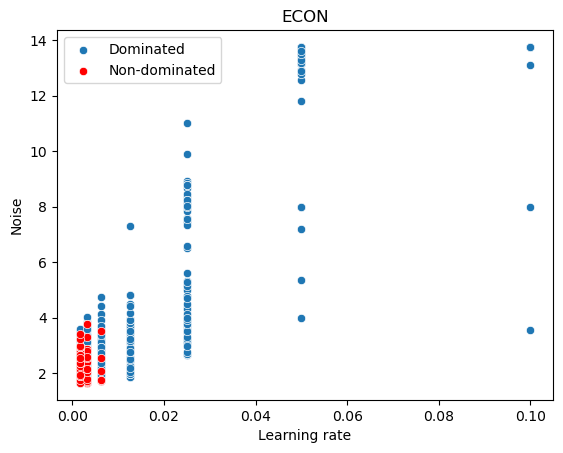

In [30]:
sns.scatterplot(y='noise 5%', x='learning_rate', data=dataset_df, label='Dominated')
sns.scatterplot(y='noise 5%', x='learning_rate', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Noise')
plt.xlabel('Learning rate')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

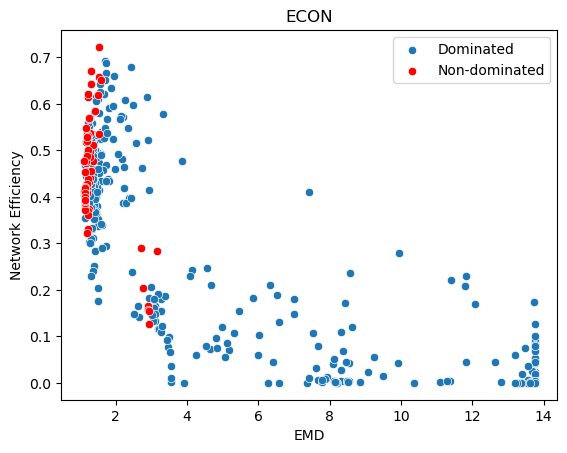

In [31]:
sns.scatterplot(y='net_efficiency', x='emd', data=dataset_df, label='Dominated')
sns.scatterplot(y='net_efficiency', x='emd', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Network Efficiency')
plt.xlabel('EMD')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

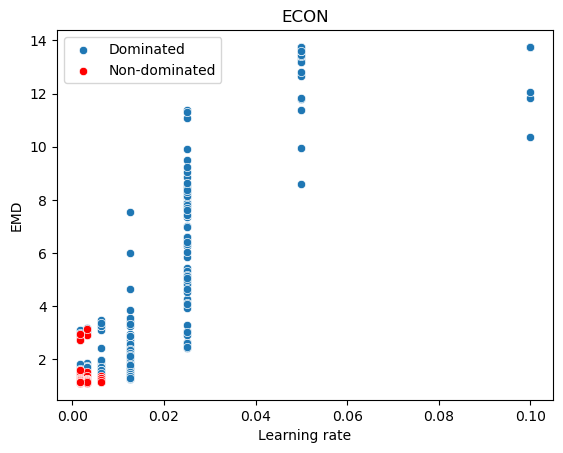

In [32]:
sns.scatterplot(x='learning_rate', y='emd', data=dataset_df, label='Dominated')
sns.scatterplot(x='learning_rate', y='emd', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.xlabel('Learning rate')
plt.ylabel('EMD')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

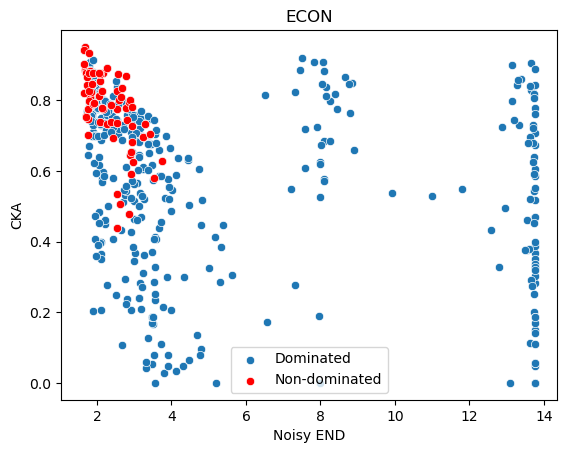

In [33]:
sns.scatterplot(y='avg_cka', x='noise 5%', data=dataset_df, label='Dominated')
sns.scatterplot(y='avg_cka', x='noise 5%', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('CKA')
plt.xlabel('Noisy END')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

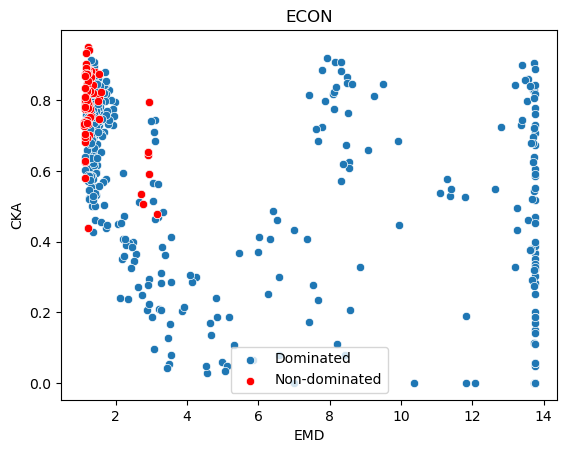

In [34]:
sns.scatterplot(y='avg_cka', x='emd', data=dataset_df, label='Dominated')
sns.scatterplot(y='avg_cka', x='emd', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('CKA')
plt.xlabel('EMD')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

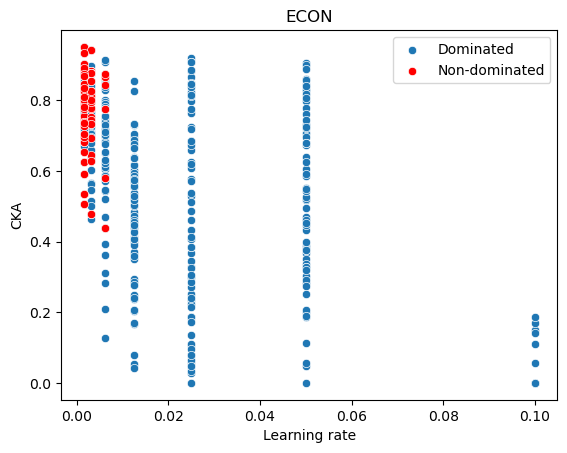

In [35]:
sns.scatterplot(y='avg_cka', x='learning_rate', data=dataset_df, label='Dominated')
sns.scatterplot(y='avg_cka', x='learning_rate', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('CKA')
plt.xlabel('Learning rate')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

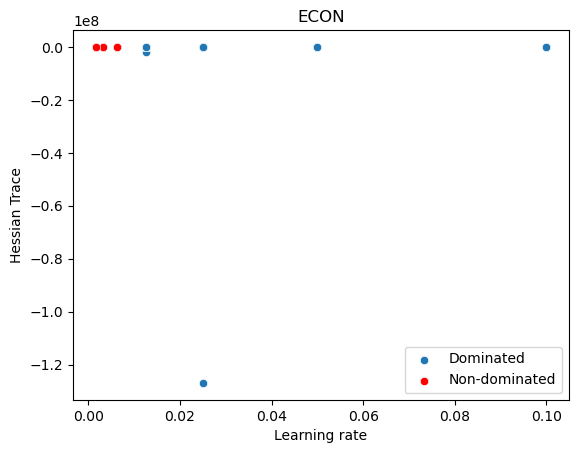

In [36]:
sns.scatterplot(y='trace', x='learning_rate', data=dataset_df, label='Dominated')
sns.scatterplot(y='trace', x='learning_rate', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Hessian Trace')
plt.xlabel('Learning rate')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

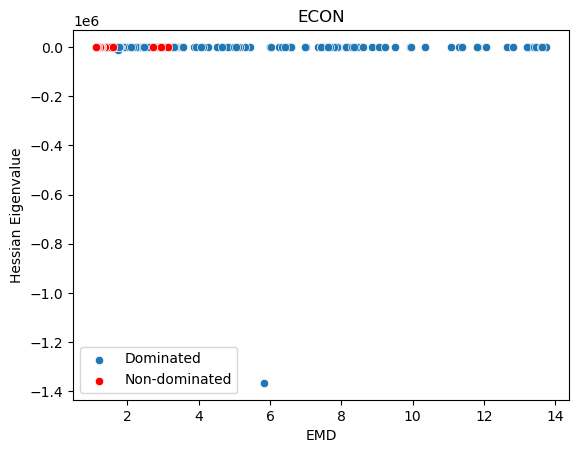

In [37]:
sns.scatterplot(y='eigenvalue', x='emd', data=dataset_df, label='Dominated')
sns.scatterplot(y='eigenvalue', x='emd', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Hessian Eigenvalue')
plt.xlabel('EMD')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

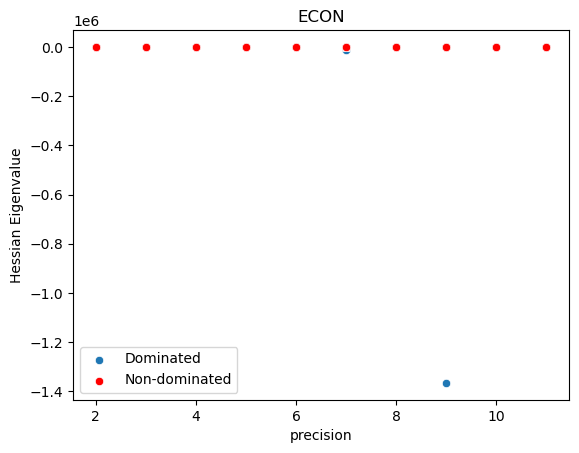

In [38]:
sns.scatterplot(y='eigenvalue', x='precision', data=dataset_df, label='Dominated')
sns.scatterplot(y='eigenvalue', x='precision', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Hessian Eigenvalue')
plt.xlabel('precision')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

### 3D plots

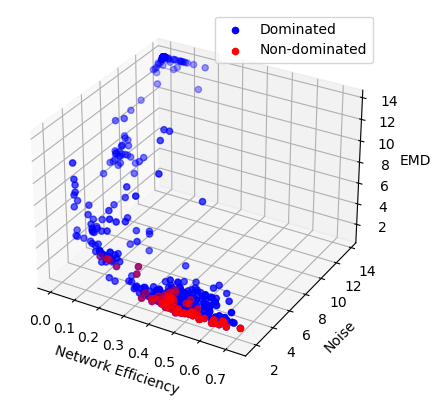

In [39]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all points
ax.scatter(dataset_df['net_efficiency'], dataset_df['noise 5%'], dataset_df['emd'], c='blue', label='Dominated')

# Highlight points based on index
highlight_indices = dataset_df[dataset_df['front'] <= FRONTS].index
highlight_df = dataset_df.iloc[highlight_indices]
ax.scatter(highlight_df['net_efficiency'], highlight_df['noise 5%'], highlight_df['emd'], c='red', label='Non-dominated')

# Set labels
ax.set_xlabel('Network Efficiency')
ax.set_zlabel('EMD')
ax.set_ylabel('Noise')

# Add legend
plt.legend()

# Show plot
plt.show()

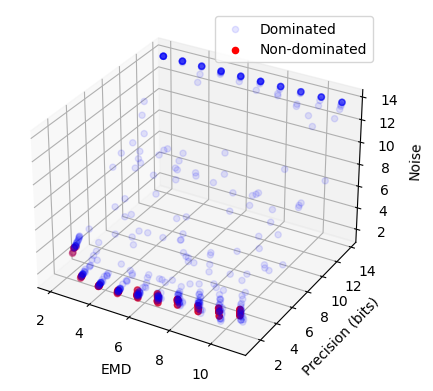

In [40]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all points
ax.scatter(dataset_df['precision'], dataset_df['emd'], dataset_df['noise 5%'], c='blue', alpha=0.1, label='Dominated')

# Highlight points based on index
highlight_indices = dataset_df[dataset_df['front'] <= FRONTS].index
highlight_df = dataset_df.iloc[highlight_indices]
ax.scatter(highlight_df['precision'], highlight_df['emd'], highlight_df['noise 5%'], c='red', label='Non-dominated')

# Set labels
ax.set_xlabel('EMD')
ax.set_ylabel('Precision (bits)')
ax.set_zlabel('Noise')

# Add legend
plt.legend()

# Show plot
plt.show()

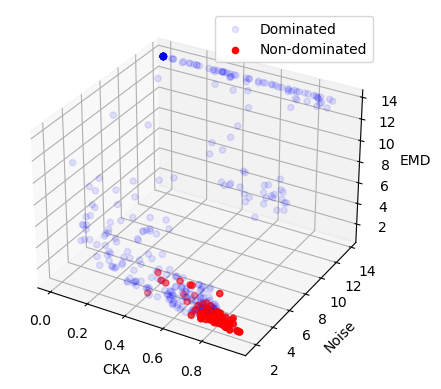

In [41]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all points
ax.scatter(dataset_df['avg_cka'], dataset_df['noise 5%'], dataset_df['emd'], c='blue', alpha=0.1, label='Dominated')

# Highlight points based on index
highlight_indices = dataset_df[dataset_df['front'] <= FRONTS].index
highlight_df = dataset_df.iloc[highlight_indices]
ax.scatter(highlight_df['avg_cka'], highlight_df['noise 5%'], highlight_df['emd'], c='red', label='Non-dominated')

# Set labels
ax.set_xlabel('CKA')
ax.set_zlabel('EMD')
ax.set_ylabel('Noise')

# Add legend
plt.legend()

# Show plot
plt.show()

In [42]:
dataset_df[dataset_df['front'] == 1]

precision       emd  noise 5%  batch_size  learning_rate   avg_cka  \
27           2  2.715291  2.543496         128       0.001563  0.533331   
62           3  1.428586  1.714786          32       0.001563  0.879041   
104          4  1.230677  1.675178          16       0.001563  0.950946   
117          4  1.243314  1.660596          64       0.003125  0.942405   
153          5  1.155972  1.649740          16       0.001563  0.902411   
160          5  1.151243  1.792468          32       0.001563  0.932709   
223          6  1.105781  2.092937         128       0.001563  0.738465   
228          6  1.147033  2.082024         256       0.006250  0.873967   
404         10  1.104643  3.295514          32       0.003125  0.731418   

       avg_EF  net_efficiency     trace  eigenvalue  front  
27  -1.751940        0.289450  4.131345    1.476649    1.0  
62  -4.213104        0.585544  4.477005    2.131615    1.0  
104 -2.074692        0.482084  4.693621    1.754795    1.0  
117 -2.875594        0.566857  4.638691    1.766435    1.0  
153 -0.832528        0.475019  4.469020    1.964603    1.0  
160 -0.536210        0.484760  5.184758    2.811941    1.0  
223 -0.028721        0.403178  5.536678    3.325435    1.0  
228 -0.396135        0.407676  5.304844    3.168468    1.0  
404 -1.291834        0.476849  6.575057    3.923268    1.0